In [155]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from keras.layers import Dense
from keras.models import Sequential,Model
from keras.callbacks import EarlyStopping,ModelCheckpoint
import keras

In [156]:
df = pd.read_csv("/content/heart disease.csv")

In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [158]:
df.fillna(df.mean(),inplace=True)

In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4238 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4238 non-null   float64
 5   BPMeds           4238 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4238 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4238 non-null   float64
 13  heartRate        4238 non-null   float64
 14  glucose          4238 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [160]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [161]:
scaler = StandardScaler()

In [162]:
numeric = ['age','cigsPerDay','totChol','sysBP','BMI','heartRate','glucose']

In [163]:
df[numeric] = scaler.fit_transform(df[numeric])

In [164]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,-1.234951,4.0,0,-0.757974,0.0,0,0,0,-0.941346,-1.195907,70.0,0.286943,0.342744,-0.217517,0
1,0,-0.418257,2.0,0,-0.757974,0.0,0,0,0,0.299595,-0.515187,81.0,0.719325,1.590275,-0.261311,0
2,1,-0.184916,1.0,1,0.925835,0.0,0,0,0,0.186782,-0.220209,80.0,-0.113502,-0.073099,-0.524078,0
3,0,1.331800,3.0,1,1.767740,0.0,0,1,0,-0.264469,0.800871,95.0,0.682474,-0.904786,0.921141,1
4,0,-0.418257,3.0,1,1.178407,0.0,0,0,0,1.089284,-0.106755,84.0,-0.663807,0.758588,0.132840,0


In [165]:
x = df.drop('TenYearCHD',axis=1)
y = df['TenYearCHD']

In [166]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size= 0.25, random_state=42)

In [167]:
model = Sequential()

In [168]:
model.add(Dense(units= 1024, activation='relu',kernel_initializer='uniform',input_dim=15))
model.add(Dense(units= 512, activation='relu',kernel_initializer='uniform'))
model.add(Dense(units= 256, activation='relu',kernel_initializer='uniform'))
model.add(Dense(units= 1,activation='sigmoid',kernel_initializer='uniform'))
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])
es = EarlyStopping(monitor='val_loss',patience=3)
mc = ModelCheckpoint('model',monitor='val_loss',mode='min')
history = model.fit(X_train,Y_train,callbacks=[es,mc],validation_data=(X_test,Y_test),batch_size=8,epochs=100)

Epoch 1/100
398/398 [==============================] - 3s 8ms/step - loss: 0.4365 - accuracy: 0.8458 - val_loss: 0.3654 - val_accuracy: 0.8566
Epoch 2/100
398/398 [==============================] - 3s 8ms/step - loss: 0.4115 - accuracy: 0.8452 - val_loss: 0.3723 - val_accuracy: 0.8585
Epoch 3/100
398/398 [==============================] - 3s 8ms/step - loss: 0.4054 - accuracy: 0.8458 - val_loss: 0.3708 - val_accuracy: 0.8566
Epoch 4/100
398/398 [==============================] - 3s 8ms/step - loss: 0.3995 - accuracy: 0.8468 - val_loss: 0.3853 - val_accuracy: 0.8566


In [169]:
prediction = model.predict(X_test)
accuracy = accuracy_score(Y_test, prediction.round())*100
print(accuracy)

85.66037735849056


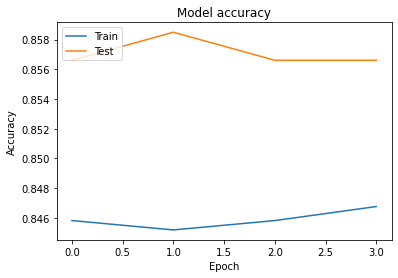

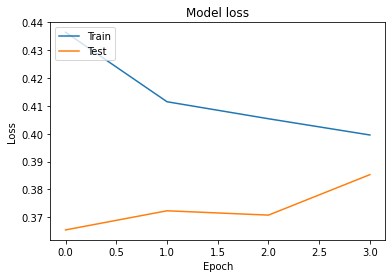

In [170]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()